In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from joblib import dump, load
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
#mengatur limit dari tiap category memiliki berapa title
limit = 1400

# data = pd.read_csv('book32-listing-clean.csv')
# grouped = data.groupby('Category')
# limited_groups = grouped.apply(lambda x: x.head(limit)).reset_index(drop=True)
# limited_groups.to_csv(f"book32-listing-clean-{limit}.csv", index=False)

#membaca data dari csv
data = pd.read_csv(f'book32-listing-clean-{limit}.csv')
print(data)

                                                   Title            Category
0                            Humans of New York: Stories  Arts & Photography
1        Lost Ocean: An Inky Adventure and Coloring Book  Arts & Photography
2      Creative Coloring Inspirations: Art Activity P...  Arts & Photography
3                                     Humans of New York  Arts & Photography
4                        Face Paint: The Story of Makeup  Arts & Photography
...                                                  ...                 ...
13995  Pass Key to the GRE, 8th Edition (Barron's Pas...    Test Preparation
13996  Great Applications for Business School, Second...    Test Preparation
13997  Barron's First Year Law School Flash Cards: 35...    Test Preparation
13998  How to Write the Perfect Personal Statement: W...    Test Preparation
13999  Sterling DAT Biology Practice Questions: High ...    Test Preparation

[14000 rows x 2 columns]


In [3]:
#membuat DataFrame dari kolom yang sudah ada (title dan category)
title = pd.DataFrame(data['Title'])
category = pd.DataFrame(data['Category'])

In [4]:
#mengecek panjang tiap DataFrame
print(len(title))
print(len(category))

14000
14000


In [5]:
#menghitung jumlah baris pada kolom title tiap category
data.groupby('Category').Title.count()

Category
Arts & Photography              1400
Business & Money                1400
Computers & Technology          1400
Education & Teaching            1400
Engineering & Transportation    1400
History                         1400
Politics & Social Sciences      1400
Reference                       1400
Science & Math                  1400
Test Preparation                1400
Name: Title, dtype: int64

In [6]:
#inisialisasi kolom category
feat = ['Category']
#membuat objek LabelEncoder yang digunakan untuk mengubah sebuah nilai menjadi nilai numerik
le = LabelEncoder()
#melakukan iterasi untuk setiap kolom category
for x in feat:
    #mengubah data pada kolom category menjadi list dan mempelajari mapping nilai uniknya dengan nilai numerik 
    le.fit(list(category[x].values))
    #mengubah kolom kategori menjadi nilai numerik berdasarkan mapping yang dipelajari sebelumnya dan disimpan kembali ke kolom category
    category[x] = le.transform(list(category[x]))

In [7]:
#menampilkan data kolom kategori yang unik
category['Category'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
#mengembalikan nilai kategori yang sesuai dari nilai numerik yang telah diubah sebelumnya menggunakan LabelEncoder
le.inverse_transform([0])[0]

'Arts & Photography'

In [9]:
#inisialisasi TfidfVectorizer dengan beberapa parameter
vectorizer = TfidfVectorizer(stop_words='english', analyzer='word', strip_accents='unicode', lowercase=True)
#mempelajari vokabular dari data title dan mengubahnya menjadi representasi vektor TF-IDF
vectors = vectorizer.fit_transform(data['Title'])
#menampilkan bentuk metrix vector yang menunjukan jumlah baris dan jumlah kolom
print(vectors.shape)

(14000, 14441)


In [10]:
#membagi data vector dan target category menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(vectors, category['Category'], test_size=0.2, train_size=0.8, random_state=0, stratify=category['Category'])

In [11]:
#menampilkan bentuk metrix
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11200, 14441)
(11200,)
(2800, 14441)
(2800,)


In [14]:
%%time

#inialisasi model LinearSVC
lsvc = LinearSVC()
#melatih model menggunakan data latih
lsvc.fit(X_train, y_train)
#membuat prediksi menggunakan model yang telah dilatih pada data uji
lsvc_pred = lsvc.predict(X_test)
#menampilkan laporan evaluasi klasifikasi
print("Classification Report:\n", classification_report(y_test, lsvc_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74       280
           1       0.77      0.82      0.79       280
           2       0.94      0.83      0.88       280
           3       0.81      0.75      0.78       280
           4       0.81      0.79      0.80       280
           5       0.75      0.87      0.80       280
           6       0.75      0.78      0.77       280
           7       0.84      0.74      0.79       280
           8       0.70      0.81      0.75       280
           9       0.95      0.86      0.91       280

    accuracy                           0.80      2800
   macro avg       0.81      0.80      0.80      2800
weighted avg       0.81      0.80      0.80      2800

CPU times: total: 19.4 s
Wall time: 19.5 s


In [106]:
%%time

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)
print("Classification Report:\n", classification_report(y_test, sgd_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.74      0.75       280
           1       0.75      0.79      0.77       280
           2       0.86      0.90      0.88       280
           3       0.79      0.75      0.77       280
           4       0.83      0.81      0.82       280
           5       0.76      0.86      0.80       280
           6       0.76      0.76      0.76       280
           7       0.83      0.74      0.78       280
           8       0.79      0.78      0.79       280
           9       0.91      0.90      0.91       280

    accuracy                           0.80      2800
   macro avg       0.80      0.80      0.80      2800
weighted avg       0.80      0.80      0.80      2800

CPU times: total: 141 ms
Wall time: 163 ms


In [107]:
%%time

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_pred = mnb.predict(X_test)
print("Classification Report:\n", classification_report(y_test, mnb_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.68      0.73       280
           1       0.74      0.78      0.76       280
           2       0.84      0.88      0.86       280
           3       0.73      0.80      0.76       280
           4       0.85      0.76      0.80       280
           5       0.76      0.86      0.81       280
           6       0.78      0.76      0.77       280
           7       0.79      0.71      0.75       280
           8       0.82      0.76      0.79       280
           9       0.83      0.92      0.87       280

    accuracy                           0.79      2800
   macro avg       0.79      0.79      0.79      2800
weighted avg       0.79      0.79      0.79      2800

CPU times: total: 31.2 ms
Wall time: 27.8 ms


In [108]:
lsvc_accuracy = round(accuracy_score(y_test, lsvc_pred),2)
sgd_accuracy = round(accuracy_score(y_test, sgd_pred),2)
mnb_accuracy = round(accuracy_score(y_test, mnb_pred),2)

print(lsvc_accuracy)
print(sgd_accuracy)
print(mnb_accuracy)

0.81
0.8
0.79


In [109]:
models = ['LSVC', 'SGD', 'MNB']
scores = [lsvc_accuracy, sgd_accuracy, mnb_accuracy]

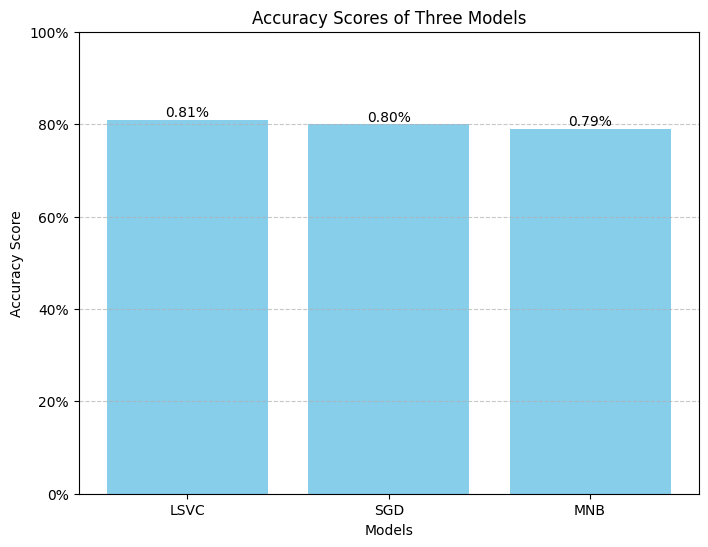

In [110]:
plt.figure(figsize=(8, 6))
bars = plt.bar(models, scores, color='skyblue')
plt.title('Accuracy Scores of Three Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}%', 
             ha='center', va='bottom', color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [111]:
text = ['Manual Book']
text[0] = text[0].lower()
text_transform = (vectorizer.transform(text))

In [112]:
lsvc_predict = (lsvc.predict(text_transform))
sgd_predict = (sgd.predict(text_transform))
mnb_predict = (mnb.predict(text_transform))

In [113]:
print("LSVC: " + le.inverse_transform(lsvc_predict)[0])
print("SGD: " + le.inverse_transform(sgd_predict)[0])
print("MNB: " + le.inverse_transform(mnb_predict)[0])

LSVC: Reference
SGD: Reference
MNB: Engineering & Transportation


In [114]:
#menyimpan data dan model terbaik
dump(le, 'label.pkl')
dump(vectorizer, 'vectorizer.pkl')
dump(lsvc, 'model.pkl')
print("Model Saved")

Model Saved
